#### Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
bank = pd.read_csv("bank.csv",sep=';')


In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
# Checking for null values

bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- There are no null values present in the data

In [8]:
# Checking for duplicates

bank[bank.duplicated()].shape

(0, 17)

In [9]:
bank.duplicated().sum()


0

- There are no duplicates in the data

In [10]:
# Correlation analysis

bank.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_80148\1295936345.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank.corr()


,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_80148\925010907.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = bank.corr()


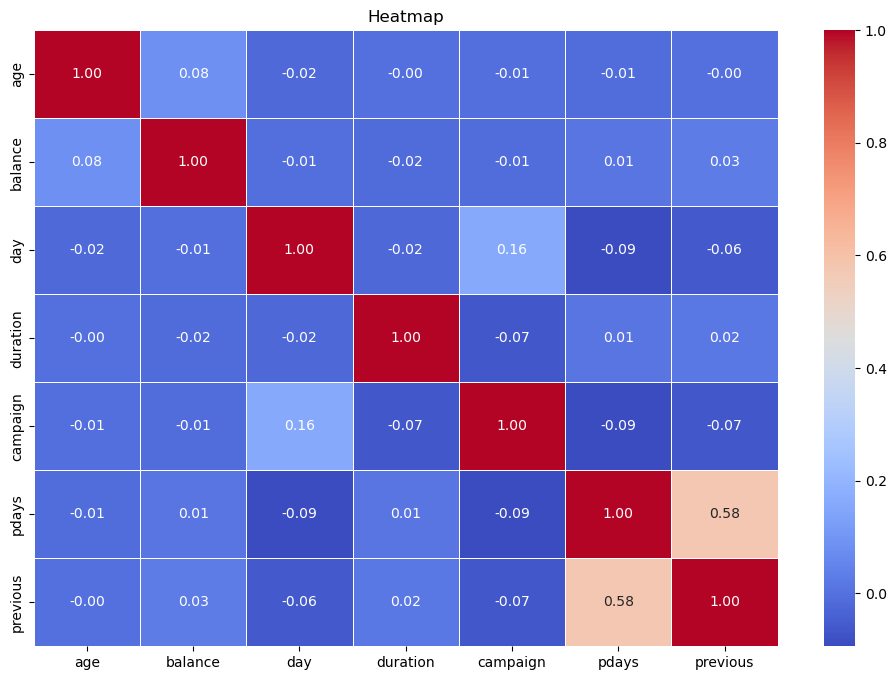

In [11]:
corr_matrix = bank.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.show()


In [13]:
# Label encoding

cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [16]:
le = LabelEncoder()
bank[cols] = bank[cols].apply(le.fit_transform)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [17]:
# Standardization

scale=StandardScaler()
scaledata=scale.fit_transform(bank)
scaledata
scaledf=pd.DataFrame(scaledata)
scaledf


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.056270,1.716804,-0.246429,-1.644755,-0.130759,0.121072,-1.142051,-0.424756,-0.723642,0.374052,1.485414,-0.711861,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
1,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,1.118644,0.875617,2.354292,-0.723642,-0.596026,0.819288,-0.169194,-0.576829,2.989044,2.041734,-2.579961,-0.360902
2,-0.583458,-0.126313,1.421396,1.026680,-0.130759,-0.024144,0.875617,-0.424756,-0.723642,0.010273,-1.845220,-0.303898,-0.576829,2.899143,0.270124,-2.579961,-0.360902
3,-1.056270,-0.126313,-0.246429,1.026680,-0.130759,0.017726,0.875617,2.354292,1.495133,-1.566105,0.153161,-0.250017,0.387967,-0.407218,-0.320413,0.444413,-0.360902
4,1.686036,-1.047871,-0.246429,-0.309038,-0.130759,-0.472753,0.875617,-0.424756,1.495133,-1.323585,0.819288,-0.146102,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,0.795246,-0.246429,-0.309038,-0.130759,-0.583410,0.875617,-0.424756,-0.723642,1.707910,-0.179903,0.250315,0.709566,-0.407218,-0.320413,0.444413,-0.360902
4517,1.496912,0.488060,-0.246429,1.026680,7.647669,-1.573671,0.875617,2.354292,1.495133,-0.838546,0.819288,-0.427057,-0.576829,-0.407218,-0.320413,0.444413,-0.360902
4518,1.496912,1.409618,-0.246429,-0.309038,-0.130759,-0.374724,-1.142051,-0.424756,-0.723642,0.374052,-1.512157,-0.434754,2.639160,-0.407218,-0.320413,0.444413,-0.360902
4519,-1.245394,-1.047871,-0.246429,-0.309038,-0.130759,-0.094925,-1.142051,-0.424756,-0.723642,-1.202326,-0.846030,-0.519426,0.387967,1.710451,1.451197,-1.571836,-0.360902


In [23]:
# Model building - Decision tree classifier


X = bank.drop("y", axis=1)
y = bank.y

In [25]:
#Train-test split

train_X, test_X, train_y, test_y = train_test_split(scaledf, y, test_size=0.3)

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y))) 

Train Score: 1.0
Test Score: 1.0


In [31]:
ypred = decision_tree.predict(test_X)
print("\nClassification Report:")
print(classification_report(test_y,ypred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1210
           1       1.00      1.00      1.00       147

    accuracy                           1.00      1357
   macro avg       1.00      1.00      1.00      1357
weighted avg       1.00      1.00      1.00      1357



In [30]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

1.0